# PROYECTO 3. Prueba Técnica de Análisis de Producto (IronHack Delivery)
**Grupo 8**

Autores: Elena, Fernando, Adive

## 1. KPIs (25 puntos)
En tu opinión, ¿cuáles son los tres principales KPIs para IronHack Delivery? Clasificados por orden de importancia decreciente. Explica tu elección y trata de hacer una estimación fundamentada de su valor. Proporciona una explicación paso a paso de tu estimación. ¿Cómo los mejorarías? Nota: Ignora los KPIs financieros puros que aplican a todos los negocios.

## 3. Experimento (25 puntos)
Nos gustaría medir el impacto de aumentar la tarifa de entrega de pedidos en una ciudad dada (sin considerar el valor de los productos), de €1.9 a €2.1, en los KPIs de la empresa.

Se te pide diseñar el experimento desde la etapa conceptual, planificar el análisis empírico y presentar las recomendaciones según los resultados del experimento.

Explica en detalle cómo abordarías esta tarea, enfocándote en lo siguiente:

- ¿Qué tipo de prueba requeriría esto?
- ¿Probarías esto solo en nuevos usuarios o en todos los usuarios activos? ¿Por qué?
- ¿Qué suposiciones harías y cómo probarías si estas suposiciones son correctas?
- ¿Qué enfoque usarías para determinar la duración del experimento?
- ¿Qué KPIs/métricas elegirías para evaluar el éxito de la prueba?
- ¿Qué pasos tomarías para analizar los resultados de la prueba?
- ¿Cuáles serían tus recomendaciones según los resultados de la prueba?

## 4. Análisis Exploratorio de Datos (Ejercicio de Programación Estadística) (25 puntos)
Te han dado un conjunto de datos sobre pedidos provenientes de socios falsos en la aplicación. Los socios falsos son las tiendas que no están integradas directamente con IronHack Delivery, por lo que nuestro equipo de contenido gestiona su catálogo de productos y precios por ellos. Los pedidos de socios falsos se cobran al cliente al momento de la entrega y en muchos casos hay una discrepancia entre el monto total en el checkout de la app (products_total) y lo que el repartidor paga en la tienda (purchase_total_price), causando muchos problemas. 

Cuando el **products_total** es menor que el **purchase_total_price**, los llamamos *pedidos subautorizados*, de lo contrario, es un *pedido correctamente autorizado*. Queremos pasar del modelo de cobro a la entrega a un modelo de autorización y captura, pero primero necesitamos entender la fluctuación de precios de los pedidos anteriores para conocer el riesgo de hacerlo.

Descripción del conjunto de datos:
- order_id
- activation_time_local: hora local en que se activó el pedido
- country_code
- store_address
- final_status
- payment_status
- products: número de productos en el pedido
- products_total: monto total en el checkout (€)
- purchase_total_price: monto que el repartidor pagó en la tienda (€)

Tu tarea es realizar un proceso de Análisis Exploratorio de Datos (EDA) (R/Python) con estos datos para responder las siguientes preguntas:

- 1.- ¿Qué porcentaje de pedidos están subautorizados?
- 2.- ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?
- 3.- ¿Hay diferencias cuando se dividen por país?
- 4.- Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?
- 5.- ¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?
- 6.- Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? En otras palabras: ¿Es más - probable que se cancele un pedido a medida que aumenta la diferencia de precio?


In [1]:
import pandas as pd

# Read csv
# fake_orders_test = pd.read_csv("./project_dataset/python_raw_data/fake_orders_test.csv",
                                #  names=['order_id', 'activation_time_local', 'country_code', 'store_address', 'final_status',
                                #         'payment_status', 'products', 'products_total', 'purchase_total_price'])

# Dump csv with headers
# fake_orders_test.to_csv("./project_dataset/python_raw_data/fake_orders_test_h.csv", index=None)

# Read csv with new headers
df_fake = pd.read_csv("./project_dataset/python_raw_data/fake_orders_test_h.csv")

In [2]:
df_fake

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
1,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
4,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60396,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60397,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60398,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00


### EDA

In [3]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


In [4]:
# Cambiamos el tipo de dato para que esté como categoría
df_fake['store_address'] = df_fake['store_address'].apply(str)

type(df_fake['activation_time_local'][0]) # str
# Como la columna 'activation_time_local' tiene formato string, hay que pasarlo a datetime
df_fake['activation_time_local'] = pd.to_datetime(df_fake['activation_time_local'])
df_fake['activation_time_local']

0       2019-03-10 23:59:59
1       2019-03-10 23:58:32
2       2019-03-10 23:57:56
3       2019-03-10 23:57:33
4       2019-03-10 23:57:21
                ...        
60395   2019-03-01 00:04:31
60396   2019-03-01 00:03:53
60397   2019-03-01 00:03:06
60398   2019-03-01 00:01:01
60399   2019-03-01 00:01:00
Name: activation_time_local, Length: 60400, dtype: datetime64[ns]

#### Find NaN

In [5]:
#  Se puede observar que no hay datos nulos o NaN
df_fake.isnull().sum()

order_id                 0
activation_time_local    0
country_code             0
store_address            0
final_status             0
payment_status           0
products                 0
products_total           0
purchase_total_price     0
dtype: int64

#### value_counts() and unique()

In [6]:
# Para hacernos una idea de los datos que hay, de los valores nulos, y de los valores que toma cada columna, hacemos value_counts y unique, así como len(unique()) para todos los casos
for col in df_fake.columns:
    print(f"'{col}' value_counts: {df_fake[col].value_counts()}")
    print(f"'{col}' unique: {df_fake[col].unique()}")
    print(f"'{col}' len(unique): {len(df_fake[col].unique())}\n")

'order_id' value_counts: order_id
32003207    1
31965462    1
32003301    1
31965637    1
32003629    1
           ..
33557765    1
33530892    1
33512451    1
33512615    1
33557880    1
Name: count, Length: 60400, dtype: int64


'order_id' unique: [33557880 33512615 33512451 ... 32002046 32001950 32001318]
'order_id' len(unique): 60400

'activation_time_local' value_counts: activation_time_local
2019-03-07 10:03:04    10
2019-03-08 09:03:01     8
2019-03-07 09:03:01     7
2019-03-08 09:03:03     7
2019-03-05 10:03:06     7
                       ..
2019-03-01 00:04:31     1
2019-03-01 00:03:53     1
2019-03-01 00:03:06     1
2019-03-01 00:01:01     1
2019-03-10 23:52:55     1
Name: count, Length: 56255, dtype: int64
'activation_time_local' unique: <DatetimeArray>
['2019-03-10 23:59:59', '2019-03-10 23:58:32', '2019-03-10 23:57:56',
 '2019-03-10 23:57:33', '2019-03-10 23:57:21', '2019-03-10 23:57:13',
 '2019-03-10 23:57:06', '2019-03-10 23:55:21', '2019-03-10 23:54:06',
 '2019-03-10 23:53:55',
 ...
 '2019-03-01 00:14:50', '2019-03-01 00:14:36', '2019-03-01 00:11:00',
 '2019-03-01 00:09:57', '2019-03-01 00:09:21', '2019-03-01 00:04:31',
 '2019-03-01 00:03:53', '2019-03-01 00:03:06', '2019-03-01 00:01:01',
 '201

In [7]:
import seaborn as sns
# Definimos un color para cada cohorte, así usaremos los mismos a lo largo de todo el Notebook y Presentación
my_colors = sns.color_palette("tab20") # type: list
my_palette = sns.color_palette(my_colors) # type: seaborn.palettes._ColorPalette
my_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

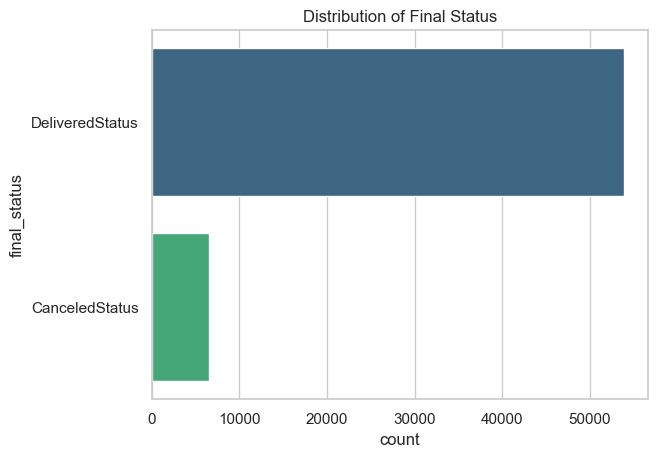

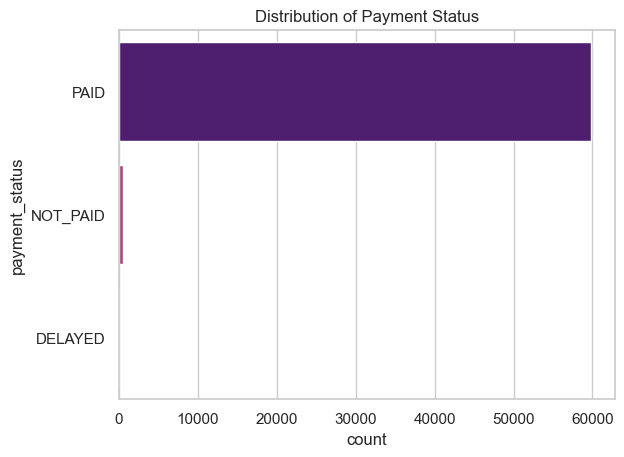

C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\3749675422.py:13: UserWarning: 
The palette list has fewer values (20) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_fake, y='country_code', hue='country_code', palette=my_palette)


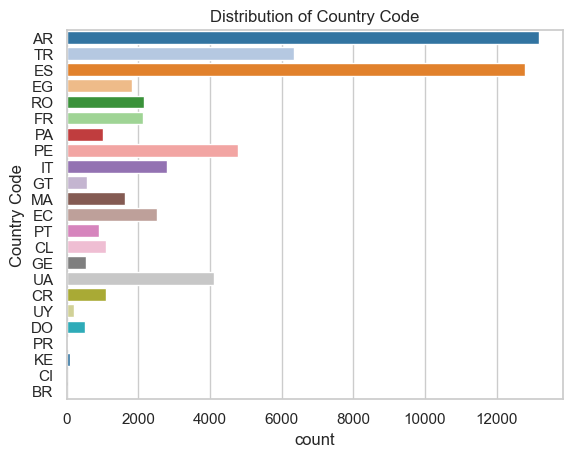

In [8]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

sns.countplot(data=df_fake, y='final_status', hue='final_status', palette='viridis')
plt.title("Distribution of Final Status")
plt.show()

sns.countplot(data=df_fake, y='payment_status', hue='payment_status', palette='magma')
plt.title("Distribution of Payment Status")
plt.show()

sns.countplot(data=df_fake, y='country_code', hue='country_code', palette=my_palette)
plt.ylabel("Country Code")
plt.title("Distribution of Country Code")
plt.show()


Text(0.5, 1.0, 'Distribution of €')

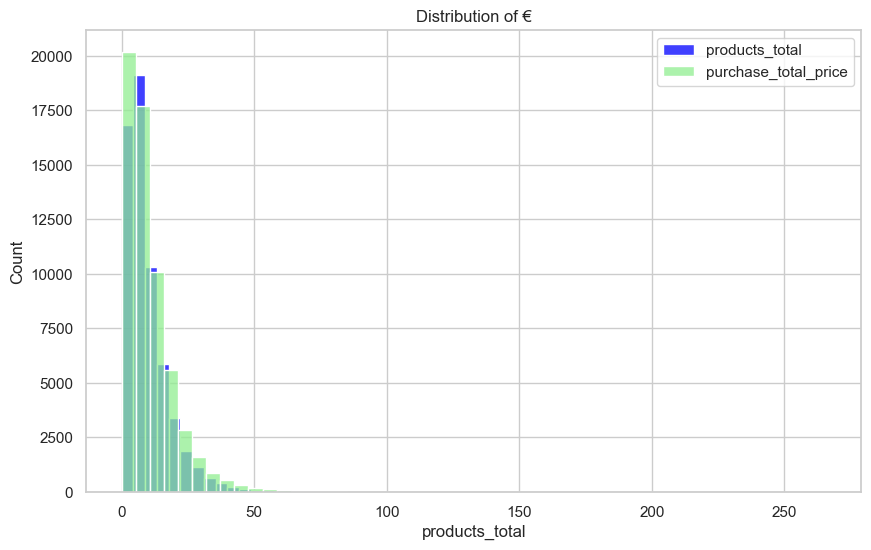

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_fake, x='products_total', bins=50, color='blue', label='products_total')
sns.histplot(data=df_fake, x='purchase_total_price', bins=50, color='lightgreen', label='purchase_total_price')
plt.legend(loc='upper right')
plt.title(f"Distribution of €")

### 1. - ¿Qué porcentaje de pedidos están subautorizados?

In [10]:
df_fake_subauthorized = df_fake[df_fake['products_total'] < df_fake['purchase_total_price']]
df_fake_subauthorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
7,33511759,2019-03-10 23:55:21,TR,47493,DeliveredStatus,PAID,2,2.37,2.45
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17
...,...,...,...,...,...,...,...,...,...
60380,31965637,2019-03-01 00:30:50,TR,44528,DeliveredStatus,PAID,1,3.44,6.89
60389,32002620,2019-03-01 00:14:57,AR,62623,DeliveredStatus,PAID,2,1.79,5.36
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91


In [11]:
df_fake_authorized = df_fake[df_fake['products_total'] >= df_fake['purchase_total_price']]
df_fake_authorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00
6,33524023,2019-03-10 23:57:06,EG,73739,DeliveredStatus,PAID,3,10.19,1.61
8,33511416,2019-03-10 23:54:06,TR,33400,DeliveredStatus,PAID,1,3.93,3.93
...,...,...,...,...,...,...,...,...,...
60392,32005602,2019-03-01 00:11:00,PE,59011,CanceledStatus,PAID,1,6.65,0.00
60393,31961779,2019-03-01 00:09:57,TR,34953,DeliveredStatus,PAID,1,1.80,1.80
60394,32002340,2019-03-01 00:09:21,AR,14455,DeliveredStatus,NOT_PAID,2,5.14,5.14
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00


In [12]:
perc_authorized = 100*(len(df_fake_authorized) / len(df_fake))
print(f"Porcentaje de pedidos autorizados: {perc_authorized:.3f}%")

Porcentaje de pedidos autorizados: 42.416%


#### Solución

In [13]:
perc_subauthorized = 100*(len(df_fake_subauthorized) / len(df_fake))
print(f"Porcentaje de pedidos subautorizados: {perc_subauthorized:.3f}%")

Porcentaje de pedidos subautorizados: 57.584%


### 2.- ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?


In [14]:
df_fake_authorized_inc = df_fake[df_fake['products_total'] * 1.2 >= df_fake['purchase_total_price']]
df_fake_authorized_inc

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
1,33512615,2019-03-10 23:58:32,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33,ES,19777,CanceledStatus,PAID,1,12.95,0.00
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
6,33524023,2019-03-10 23:57:06,EG,73739,DeliveredStatus,PAID,3,10.19,1.61
...,...,...,...,...,...,...,...,...,...
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60396,32002079,2019-03-01 00:03:53,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60398,32001950,2019-03-01 00:01:01,AR,62504,CanceledStatus,PAID,1,4.91,0.00


#### Solución

In [15]:
perc_authorized_inc = 100*(len(df_fake_authorized_inc) / len(df_fake))
print(f"Porcentaje de pedidos autorizados con una autorización incremental (+20%) sobre el monto en el checkout: {perc_authorized_inc:.3f}%")

Porcentaje de pedidos autorizados con una autorización incremental (+20%) sobre el monto en el checkout: 69.035%


Antes de la autorización incremental (+20%) sobre el monto del checkout, el porcentaje de pedidos autorizados era 42.416%, ahora al haber hecho el incremento, hemos pasado a  69.035%.

### 3.- ¿Hay diferencias cuando se dividen por país?

In [16]:
df_fake_subauthorized_per_country = df_fake_subauthorized.groupby('country_code').size().reset_index(name='count')
df_fake_subauthorized_per_country['%'] = 100*(df_fake_subauthorized_per_country['count'] / len(df_fake))
df_fake_subauthorized_per_country.sort_values(by='%', ascending=False, inplace=True)
df_fake_subauthorized_per_country

,country_code,count,%
0,AR,7994,13.235099
8,ES,7965,13.187086
20,TR,3216,5.324503
16,PE,2675,4.428808
21,UA,2003,3.316225
6,EC,1611,2.667219
12,IT,1553,2.571192
9,FR,1402,2.321192
7,EG,1150,1.903974
19,RO,1006,1.665563


C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\3980315943.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fake_subauthorized_per_country, x='%', y='country_code', palette=my_palette)
C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\3980315943.py:1: UserWarning: 
The palette list has fewer values (20) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_fake_subauthorized_per_country, x='%', y='country_code', palette=my_palette)


Text(0.5, 1.0, '% Pedidos subautorizados por País')

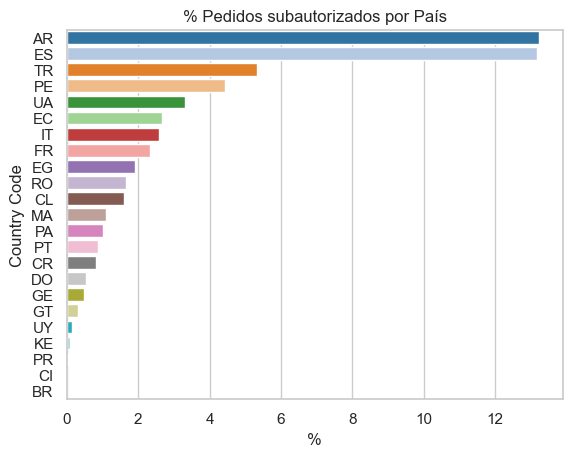

In [17]:
sns.barplot(data=df_fake_subauthorized_per_country, x='%', y='country_code', palette=my_palette)
plt.ylabel("Country Code")
plt.title("% Pedidos subautorizados por País")

In [18]:
df_fake_authorized_inc_per_country = df_fake_authorized_inc.groupby('country_code').size().reset_index(name='count')
df_fake_authorized_inc_per_country['%'] = 100*(df_fake_authorized_inc_per_country['count'] / len(df_fake))
df_fake_authorized_inc_per_country.sort_values(by='%', ascending=False, inplace=True)
df_fake_authorized_inc_per_country

,country_code,count,%
8,ES,9156,15.158940
0,AR,8758,14.500000
20,TR,4373,7.240066
16,PE,3737,6.187086
21,UA,2993,4.955298
12,IT,1968,3.258278
6,EC,1570,2.599338
19,RO,1564,2.589404
9,FR,1438,2.380795
14,MA,1265,2.094371


C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\1474686751.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fake_authorized_inc_per_country, x='%', y='country_code', palette=my_palette)
C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\1474686751.py:1: UserWarning: 
The palette list has fewer values (20) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_fake_authorized_inc_per_country, x='%', y='country_code', palette=my_palette)


Text(0.5, 1.0, '% Pedidos subautorizados (+20%) por País')

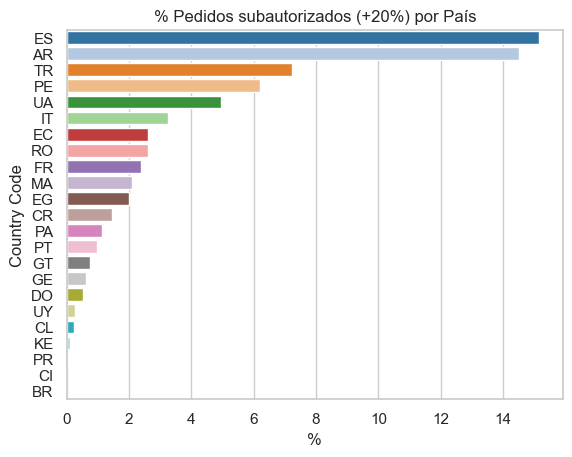

In [19]:
sns.barplot(data=df_fake_authorized_inc_per_country, x='%', y='country_code', palette=my_palette)
plt.ylabel("Country Code")
plt.title("% Pedidos subautorizados (+20%) por País")

### 4.- Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?


In [20]:
# 1. Filtrar los pedidos que no se autorizarían con el 20% de incremento
df_fake_subauthorized_inc = df_fake[df_fake['products_total'] * 1.2 < df_fake['purchase_total_price']]
df_fake_subauthorized_inc

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17
12,33530379,2019-03-10 23:52:20,FR,4444,DeliveredStatus,PAID,1,8.10,10.20
20,33509944,2019-03-10 23:48:55,TR,44528,DeliveredStatus,PAID,2,4.42,5.73
...,...,...,...,...,...,...,...,...,...
60371,32004484,2019-03-01 01:06:46,AR,33382,DeliveredStatus,PAID,2,9.83,21.44
60373,31969645,2019-03-01 00:57:47,TR,44473,DeliveredStatus,PAID,1,3.28,6.56
60374,31968802,2019-03-01 00:51:19,TR,52885,DeliveredStatus,PAID,1,2.46,5.25
60380,31965637,2019-03-01 00:30:50,TR,44528,DeliveredStatus,PAID,1,3.44,6.89


In [21]:
# 2. Calcular el monto restante necesario para cubrir el precio total de compra
df_fake_subauthorized_inc['remaining_amount'] = df_fake_subauthorized_inc['purchase_total_price'] - (df_fake_subauthorized_inc['products_total'] * 1.2)
# Mostrar los resultados
df_fake_subauthorized_inc[['purchase_total_price', 'products_total', 'remaining_amount']]

C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\1419533181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_subauthorized_inc['remaining_amount'] = df_fake_subauthorized_inc['purchase_total_price'] - (df_fake_subauthorized_inc['products_total'] * 1.2)


,purchase_total_price,products_total,remaining_amount
0,8.64,4.54,3.192
4,6.48,2.86,3.048
10,10.17,2.05,7.710
12,10.20,8.10,0.480
20,5.73,4.42,0.426
...,...,...,...
60371,21.44,9.83,9.644
60373,6.56,3.28,2.624
60374,5.25,2.46,2.298
60380,6.89,3.44,2.762


In [22]:
df_fake_subauthorized_inc['remaining_amount'].describe()

count    1.870300e+04
mean     4.739806e+00
std      8.536864e+00
min      4.440892e-16
25%      9.740000e-01
50%      2.512000e+00
75%      5.380000e+00
max      2.641820e+02
Name: remaining_amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Remaining Amount')

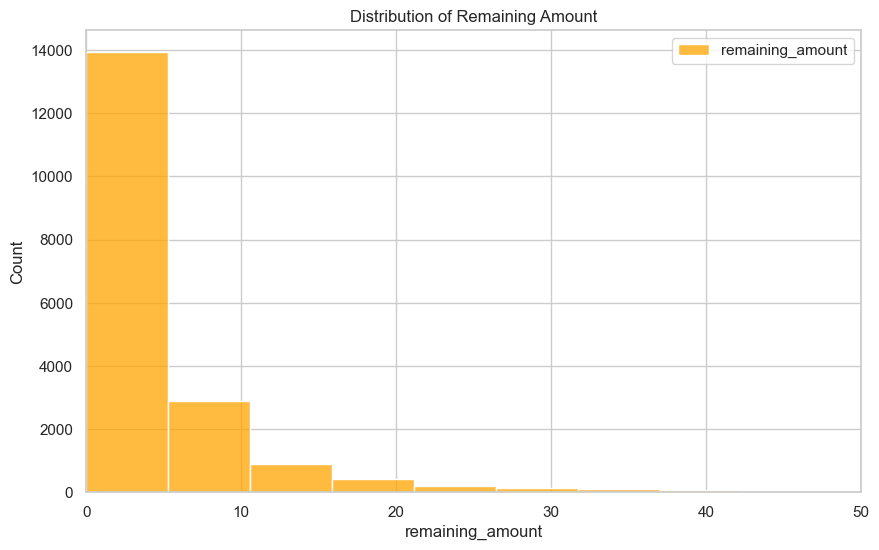

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_fake_subauthorized_inc, x='remaining_amount', bins=50, color='orange', label='remaining_amount')
plt.legend(loc='upper right')
plt.xlim([0,50])
plt.title(f"Distribution of Remaining Amount")

### 5.- ¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?


In [24]:
df_fake_subauthorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
4,33557765,2019-03-10 23:57:21,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
5,33512273,2019-03-10 23:57:13,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
7,33511759,2019-03-10 23:55:21,TR,47493,DeliveredStatus,PAID,2,2.37,2.45
10,33523444,2019-03-10 23:53:38,RO,72549,DeliveredStatus,PAID,2,2.05,10.17
...,...,...,...,...,...,...,...,...,...
60380,31965637,2019-03-01 00:30:50,TR,44528,DeliveredStatus,PAID,1,3.44,6.89
60389,32002620,2019-03-01 00:14:57,AR,62623,DeliveredStatus,PAID,2,1.79,5.36
60395,31960607,2019-03-01 00:04:31,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60397,32002046,2019-03-01 00:03:06,AR,55159,DeliveredStatus,PAID,1,4.24,4.91


In [25]:
df_fake_subauthorized_per_store= df_fake_subauthorized.groupby('store_address').size().reset_index(name='count')
df_fake_subauthorized_per_store['%'] = 100*(df_fake_subauthorized_per_store['count'] / len(df_fake))
df_fake_subauthorized_per_store.sort_values(by='%', ascending=False, inplace=True)
df_fake_subauthorized_per_store

,store_address,count,%
844,28671,448,0.741722
849,28712,217,0.359272
833,28286,204,0.337748
264,14455,179,0.296358
146,11694,160,0.264901
...,...,...,...
4552,9545,1,0.001656
4551,9528,1,0.001656
4550,9471,1,0.001656
20,10288,1,0.001656


In [26]:
df_fake_subauthorized_per_store.head(10)

,store_address,count,%
844,28671,448,0.741722
849,28712,217,0.359272
833,28286,204,0.337748
264,14455,179,0.296358
146,11694,160,0.264901
843,28669,158,0.261589
184,12513,126,0.208609
2381,55206,120,0.198675
804,27635,116,0.192053
3131,62935,111,0.183775


C:\Users\emartin4\AppData\Local\Temp\ipykernel_12616\3222119965.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fake_subauthorized_per_store.head(10), x='%', y='store_address', palette='viridis', orient='h')


Text(0.5, 1.0, '% Pedidos subautorizados por Tienda')

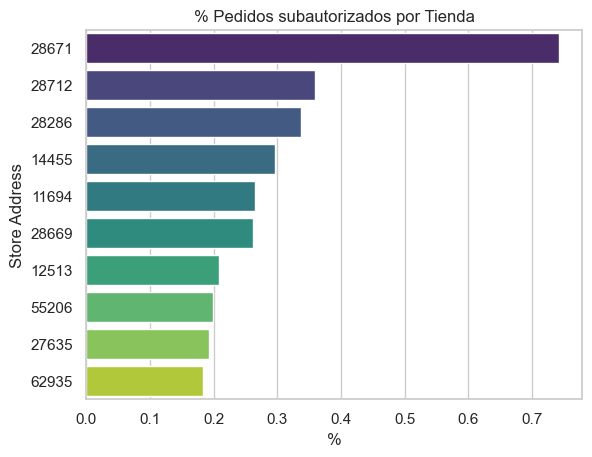

In [27]:
sns.barplot(data=df_fake_subauthorized_per_store.head(10), x='%', y='store_address', palette='viridis', orient='h')
plt.ylabel("Store Address")
plt.title("% Pedidos subautorizados por Tienda")

### 6.- Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? En otras palabras: ¿Es más - probable que se cancele un pedido a medida que aumenta la diferencia de precio?
